<a href="https://colab.research.google.com/github/PraeJi/Deep-Learning-for-Image/blob/main/AI_Model_with_Images_(Keras%2CTensorflow).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Tue Aug 27 01:50:08 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# Prepare the Data

## Load and split data

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
import numpy as np

In [ ]:
# Load the data and split it between train and test sets
(train_set, train_ans), (val_set, val_ans) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
print(train_set.shape)
print(train_ans.shape)
print(val_set.shape)
print(val_ans.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
print(train_set[0].shape)

(28, 28)


In [ ]:
print(train_set[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

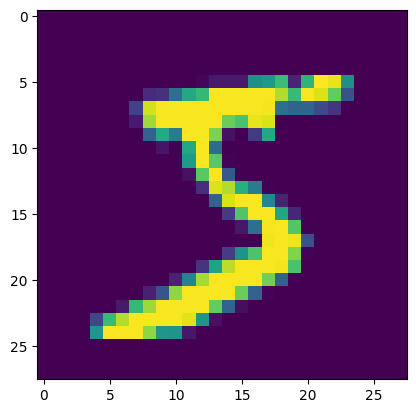

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_set[0])

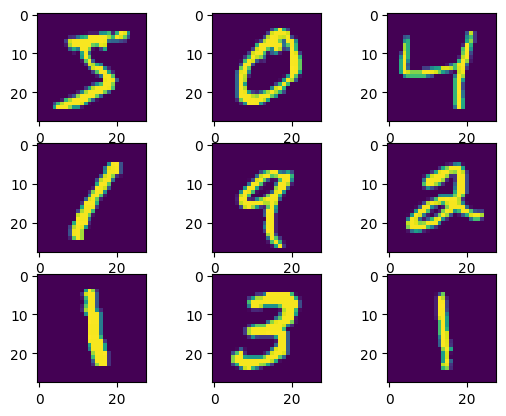

In [ ]:
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(train_set[i])

In [ ]:
'''
image มีค่าสีตั้งแต่ 0-255
เมื่อหารด้วย 255 จะได้ค่าไม่เกิน 1
ดังนั้น before 0=black,255=white
after 0=black,1=white
'''

train_set = train_set/255 #หาร 255 เพื่อให้เป็นทศนิยม
val_set = val_set/255

In [ ]:
print(train_ans[0])

5


Note:
ในเรื่องนี้ไม่ควรใช้ mse (mean square error)
ใช้ Category Cross Entropy

##ทำผลเฉลยด้วย One hot encoding

In [ ]:
# Category Cross Entropy

# ใช้ One hot encoding มาทำผลเฉลย
# data เลข 0-9 => 10 ตัว
# ตัวอย่าง
print(train_ans[0])
[0,0,0,0,0,1,0,0,0,0] #5

5


[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

In [ ]:
# One Hot Encoding
train_ans = tf.keras.utils.to_categorical(train_ans,10)
val_ans = tf.keras.utils.to_categorical(val_ans,10)

# Build the model (with Sequential)

Flatten Layer

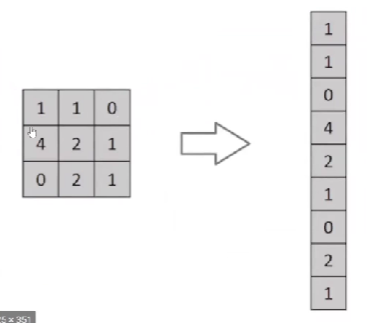

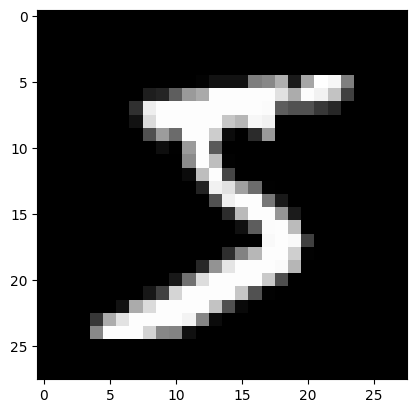

In [ ]:
plt.imshow(train_set[0],cmap='gray')

In [ ]:
model = Sequential()
#รอบที่ 1
model.add(Conv2D(filters=8,kernel_size=(3,3),padding='same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D())

#รอบที่ 2
model.add(Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D())

#รอบที่ 3
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

'''
Note:
- padding='same' คือให้ผลลัพธ์หลังทำ convol มีขนาดเท่าเดิม
- (28,28,1) เลข 1 คือ จำนวน channel เป็น 1 แสดงว่าเป็นภาพขาวดำ
- เลือกใช้ maxpooling  เพราะรูปภาพเป็นขาวดำ
- ส่วนใหญ่รูปภาพจะหายไปครึ่งนึงจากการทำ maxpooling จึงควรเพิ่ม filters เป็นเท่านึงจากการทำ convol ชั้นก่อนหน้า
- ใช้ relu เพราะอยากให้เป็นจน.เต็มบวกทั้งหมด
'''

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 8)           │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 16)          │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 32)            │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 288)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             170 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,594 (99.98 KB)

 Trainable params: 25,594 (99.98 KB)

 Non-trainable params: 0 (0.00 B)

"\nNote:\n- padding='same' คือให้ผลลัพธ์หลังทำ convol มีขนาดเท่าเดิม\n- (28,28,1) เลข 1 คือ จำนวน channel เป็น 1 แสดงว่าเป็นภาพขาวดำ\n- เลือกใช้ maxpooling  เพราะรูปภาพเป็นขาวดำ\n- ส่วนใหญ่รูปภาพจะหายไปครึ่งนึงจากการทำ maxpooling จึงควรเพิ่ม filters เป็นเท่านึงจากการทำ convol ชั้นก่อนหน้า\n- ใช้ relu เพราะอยากให้เป็นจน.เต็มบวกทั้งหมด\n"

# Train the Model

In [ ]:
model.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=["acc"])
history = model.fit(
    x = train_set,
    y = train_ans,
    batch_size = 100,
    epochs = 5,
    validation_data = (val_set,val_ans),
    validation_batch_size = 128
)

Epoch 1/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - acc: 0.7172 - loss: 0.8518 - val_acc: 0.9523 - val_loss: 0.1538
Epoch 2/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.9676 - loss: 0.1092 - val_acc: 0.9766 - val_loss: 0.0777
Epoch 3/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.9768 - loss: 0.0743 - val_acc: 0.9760 - val_loss: 0.0767
Epoch 4/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - acc: 0.9821 - loss: 0.0584 - val_acc: 0.9855 - val_loss: 0.0448
Epoch 5/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - acc: 0.9849 - loss: 0.0495 - val_acc: 0.9881 - val_loss: 0.0377


In [ ]:
pred = model.predict(val_set)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
print(val_ans[100])
print(pred[100])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[1.7827982e-05 7.1817858e-09 1.2237117e-06 2.0451241e-06 2.1667776e-07
 1.3290932e-04 9.9983478e-01 1.0853080e-06 9.8567552e-06 2.6551470e-08]


<Axes: >

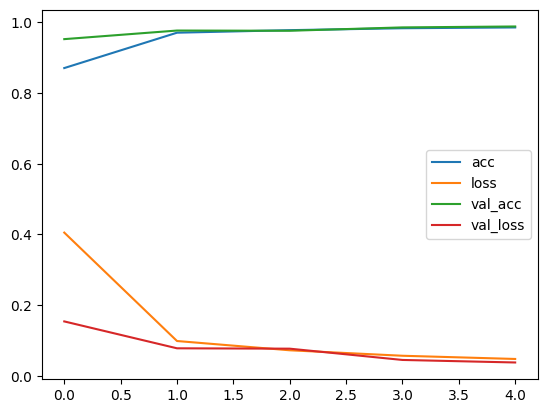

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot()

# Practice: dataset: "cifar10"

In [ ]:
!nvidia-smi

Tue Aug 27 01:50:47 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   56C    P0              27W /  70W |    645MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Prepare Data

### Load and split data

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.datasets import cifar10
from keras import *
from keras.utils import *
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(train_set,train_ans),(val_set,val_ans) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [ ]:
print(train_set.shape)
print(train_ans.shape)
print(val_set.shape)
print(val_ans.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
# Checking the number of unique classes
print(np.unique(train_ans))
print(np.unique(val_ans))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
# สร้างตัวแปรเก็บจน.คลาส
num_classes = len(np.unique(train_ans))
print(num_classes)

10


In [ ]:
print(train_set[0].shape)

(32, 32, 3)


In [ ]:
print(train_set[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


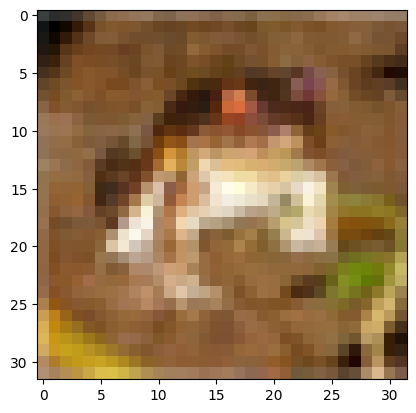

In [ ]:
plt.imshow(train_set[0])

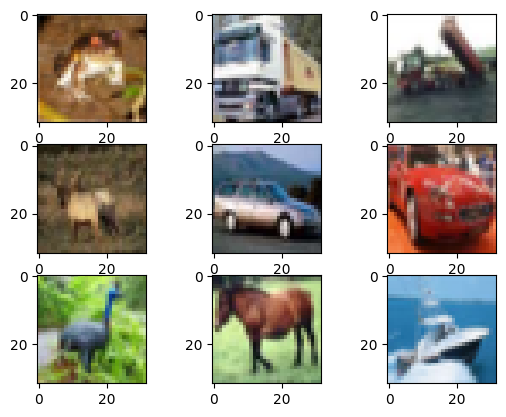

In [ ]:
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(train_set[i])

In [ ]:
train_set = train_set/255
val_set = val_set/255

In [ ]:
print(train_set[0])

[[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.07843137]]

 [[0.70588235 0.54509804 0.37647059]
  [0.67843137 0.48235294 0.16470588]


In [ ]:
print(train_ans[0])

[6]


In [ ]:
# One Hot Encoding
train_ans = tf.keras.utils.to_categorical(train_ans,10)
val_ans = tf.keras.utils.to_categorical(val_ans,10)

In [ ]:
print(train_ans[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


## Build the model

In [ ]:
# Creating a sequential model and adding layers to it

model = Sequential()

model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))    # num_classes = 10

# Checking the model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 552,874 (2.11 MB)

 Trainable params: 551,722 (2.10 MB)

 Non-trainable params: 1,152 (4.50 KB)

In [ ]:
'''model = Sequential()
#รอบที่ 1
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(32,32,3)))
model.add(MaxPooling2D())

#รอบที่ 2
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D())

#รอบที่ 3
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()'''

"model = Sequential()\n#รอบที่ 1\nmodel.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',input_shape=(32,32,3)))\nmodel.add(MaxPooling2D())\n\n#รอบที่ 2\nmodel.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))\nmodel.add(MaxPooling2D())\n\n#รอบที่ 3\nmodel.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))\nmodel.add(MaxPooling2D())\n\nmodel.add(Flatten())\nmodel.add(Dense(128, activation='relu'))\nmodel.add(Dense(64, activation='relu'))\nmodel.add(Dense(num_classes, activation='softmax'))\nmodel.summary()"

## Train the model

In [ ]:
model.compile(loss="categorical_crossentropy",optimizer=tf.keras.optimizers.Adam(),metrics=["acc"])
history = model.fit(
    x = train_set,
    y = train_ans,
    batch_size=64, # 50,000/64 = 782 => เทรนครั้งละ 64 ภาพ ทั้งหมด 782 ครั้ง ใน 1 epoch
    epochs=20, # เทรนภาพทั้งหมด 20 รอบ
    validation_data=(val_set, val_ans)
)

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 20ms/step - acc: 0.3207 - loss: 2.1210 - val_acc: 0.5320 - val_loss: 1.3411
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - acc: 0.5497 - loss: 1.2589 - val_acc: 0.6558 - val_loss: 0.9573
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - acc: 0.6327 - loss: 1.0419 - val_acc: 0.7019 - val_loss: 0.8315
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - acc: 0.6786 - loss: 0.9228 - val_acc: 0.7184 - val_loss: 0.7984
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - acc: 0.7068 - loss: 0.8393 - val_acc: 0.7419 - val_loss: 0.7191
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - acc: 0.7342 - loss: 0.7670 - val_acc: 0.7254 - val_loss: 0.7953
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - acc: 0.7475 - loss: 0.7248 - val_acc: 0.7746 - val_loss: 0.6600
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - acc: 0.7635 - loss: 0.6896 - val_acc: 0.7990 - val_loss: 0.5839
Epoch 9/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/st

## Evaluation Test

In [ ]:
# Making prediction
pred = model.predict(val_set)
print(pred)

# Converting the predictions into label index
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
[[9.8937130e-07 9.5128854e-07 9.4897077e-05 ... 1.0607387e-05
  1.9170741e-06 9.4255523e-07]
 [6.8988062e-05 3.3791778e-03 3.5124884e-08 ... 1.0990395e-08
  9.9648166e-01 6.9708338e-05]
 [2.7848908e-04 2.0746043e-02 3.9363531e-05 ... 1.7389608e-05
  9.7526824e-01 2.7163220e-03]
 ...
 [1.0568966e-06 2.6895134e-07 1.9932928e-04 ... 5.8911205e-04
  2.0571481e-07 3.8760842e-07]
 [2.4329934e-02 9.4734156e-01 1.5088969e-03 ... 2.5706802e-04
  9.0355752e-04 3.2443786e-03]
 [1.3935097e-07 4.4746418e-08 1.6391560e-06 ... 9.9964726e-01
  5.8958873e-09 1.3649020e-08]]
[3 8 8 ... 5 1 7]


In [ ]:
print(pred[0])
print(val_ans[0])

[9.8937130e-07 9.5128854e-07 9.4897077e-05 9.9509168e-01 8.0629743e-06
 4.0208823e-03 7.6917571e-04 1.0607387e-05 1.9170741e-06 9.4255523e-07]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [ ]:
# Creating a list of all the class labels
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

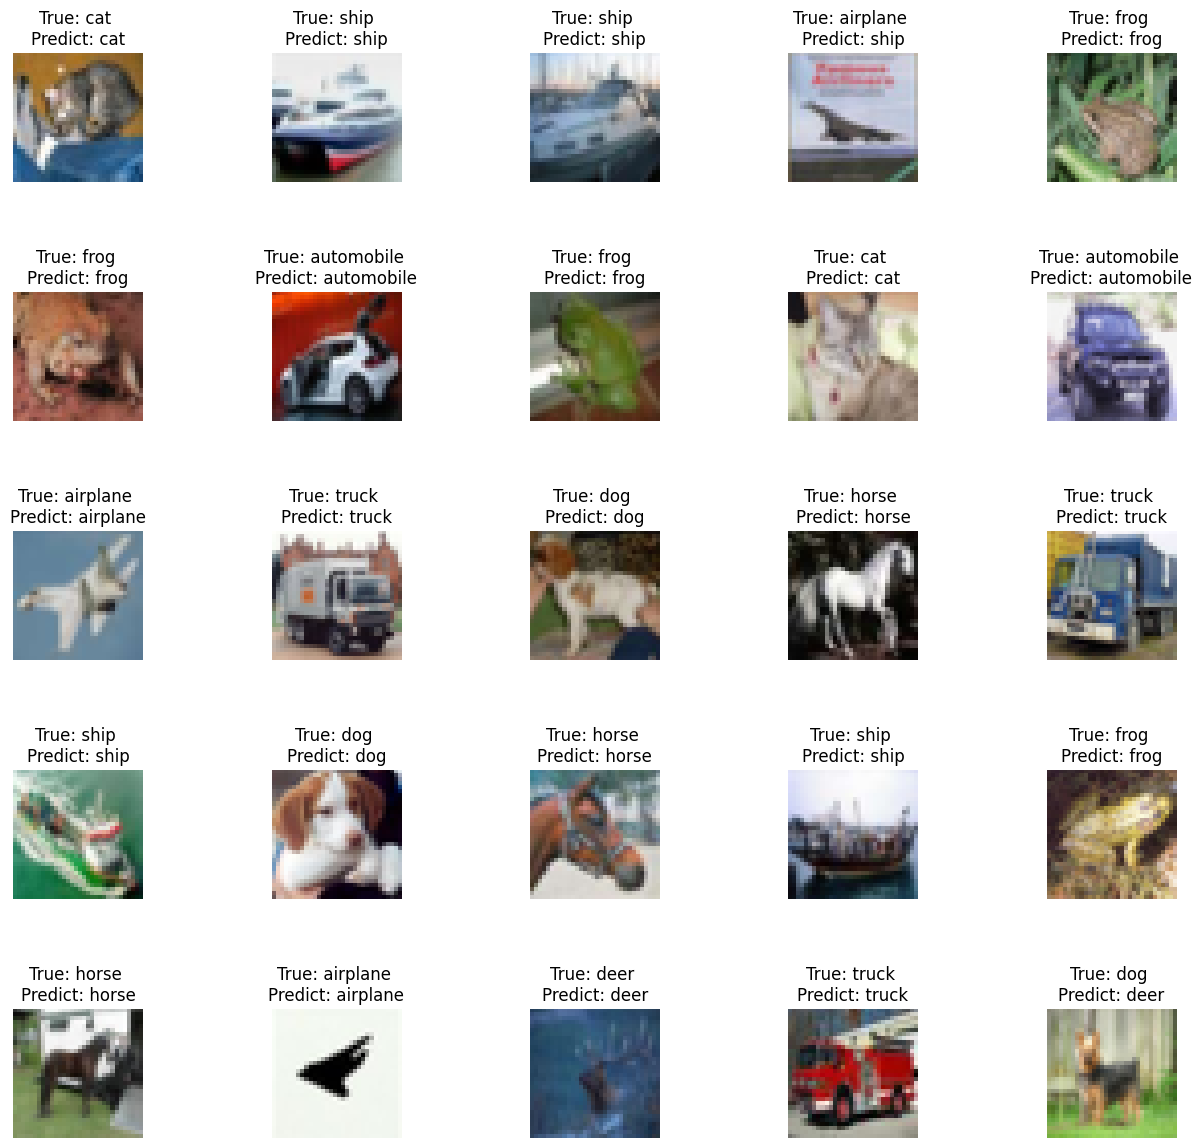

In [ ]:
# Plotting the Actual vs. Predicted results

fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(val_set[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(val_ans[i])], class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

## Visualizing the Evaluation

<Axes: >

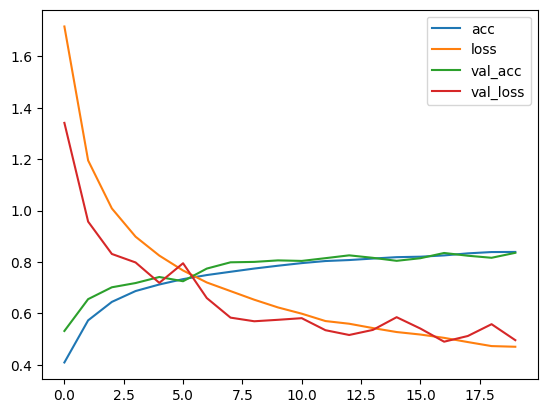

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot()

Text(0.5, 1.0, 'Loss Curves')

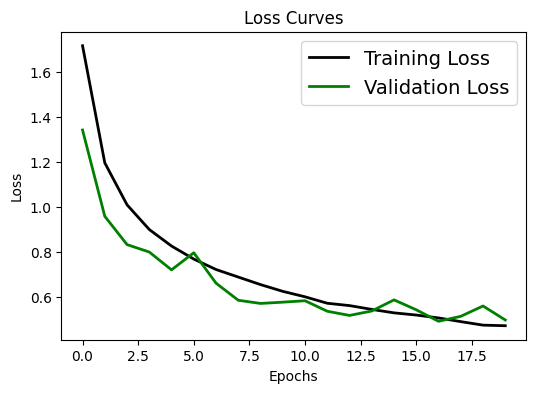

In [ ]:
# Loss curve
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

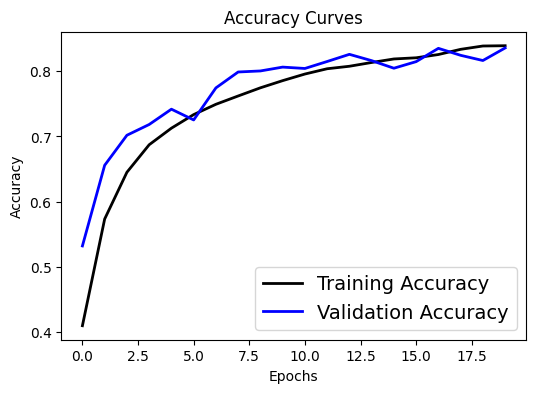

In [ ]:
# Accuracy curve
plt.figure(figsize=[6,4])
plt.plot(history.history['acc'], 'black', linewidth=2.0)
plt.plot(history.history['val_acc'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)